# Project: determine a player's rank from stats <br>
P - performance measure will be how well it predicts the rank of a test case from season 2  <br>
E - environment  is data points pulled from season 4 of overwatch 2 of each hero <br>
A -  Actuator is the prediction of the rank of the player  <br>
S - sensors are the factors given to the MLR agent (i.e; 'KDA Ratio', 'Win Rate, %', 'Eliminations / 10min', 'Objective Kills / 10min', 'Objective Time / 10min', 'Damage / 10min', 'Healing / 10min', 'Deaths / 10min') <br>



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
class ClassiferAgent: 
    def __init__(self):
        self.df = pd.read_csv("ow2.csv")
        self.labels = list(self.df.keys())
        self.label_encoder = LabelEncoder()
        self.target = self.labels[1]
        self.features = [label for label in self.labels if label != self.target]

    def Clean(self): 
        df = self.df
        labels = self.labels
        clean_df = df[df["Skill Tier"] != "All"]  #returns the average hero stats of all skill tiers 
        clean_df = clean_df[labels[0:11]] # returns only the non unique hero stats
        for i in range(10):  # fills the NaN with 0 for easier processing
            clean_df[labels[i]] = clean_df[labels[i]].fillna(0)
        self.clean_df = clean_df
        self.clean_features = [label for label in list(self.clean_df.keys()) if label != self.target]
    
    def Visualize(self): 
        df = self.clean_df
        features = self.clean_features
        for feature in features: 
            y = df[self.target]
            x = df[feature]
            plt.figure(figsize=(8, 6))
            plt.scatter(x, y, marker='o', color='red', alpha=0.5)
            plt.ylabel(self.target)
            plt.xlabel(feature)
            plt.title('Scatter Plot: ' + feature + ' vs. ' + self.target)
            plt.show()
    

    def Encoding(self): 
        df = self.clean_df 
        feature_list = self.clean_features
        df['Hero_encoded'] = self.label_encoder.fit_transform(df['Hero'])
        feature_list.remove('Hero')
        feature_list.append('Hero_encoded')
        print(feature_list)
        features_df = df[feature_list]
        
        target_df = df[self.target]
        

        x_train, x_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.1, random_state=42)
        
        self.encoded_df = df

        self.x_train = x_train
        self.y_train = y_train

        self.x_test = x_test
        self.y_test = y_test
    
    def Train(self): 
        classifier = KNeighborsClassifier(n_neighbors=5)
        classifier.fit(self.x_train, self.y_train)

        self.pred = classifier.predict(self.x_test)
        self.classifier = classifier
    
    def Evaluate(self): 
        print("performance evaluation: ")
        print(classification_report(self.y_test, self.pred))

        print("Accuracy: ")
        print(accuracy_score(self.y_test, self.pred))

        print(confusion_matrix(self.y_test, self.pred))

    def Predict(self, hero, KDA, pickrate, winrate, elims, objkills, objtime, damage, healing, deaths):
        hero_list = [hero]
        hero_encoded = self.label_encoder.fit_transform(hero_list)
        prediction = self.classifier.predict([[hero_encoded[0], KDA, pickrate, winrate, elims, objkills,objtime, damage, healing, deaths]])
        print(prediction)
    




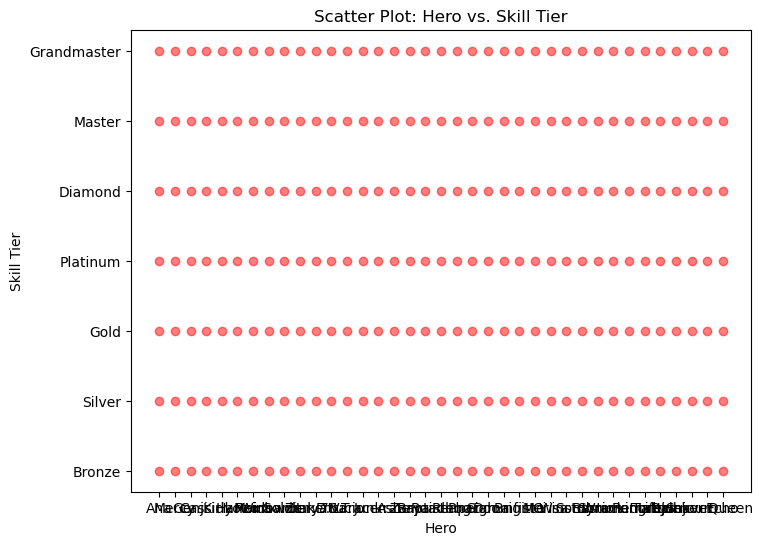

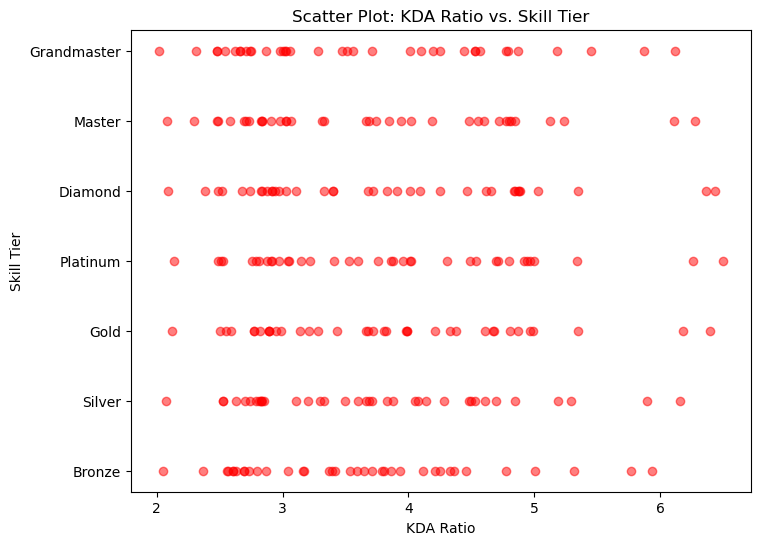

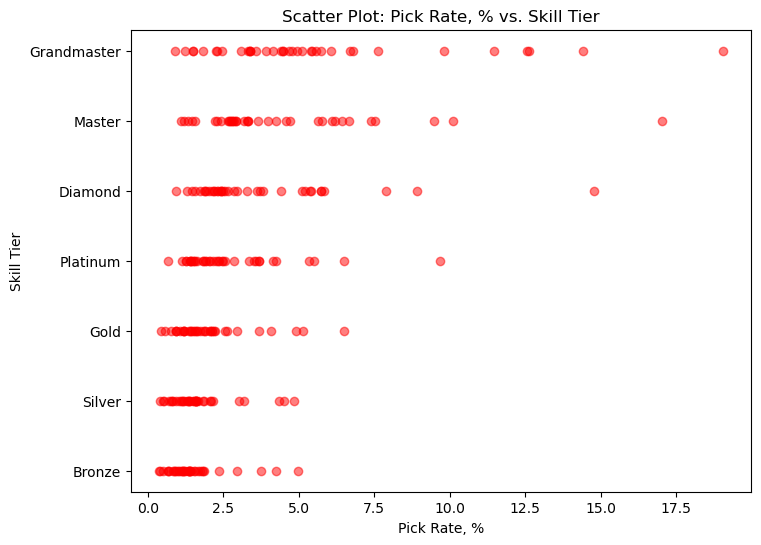

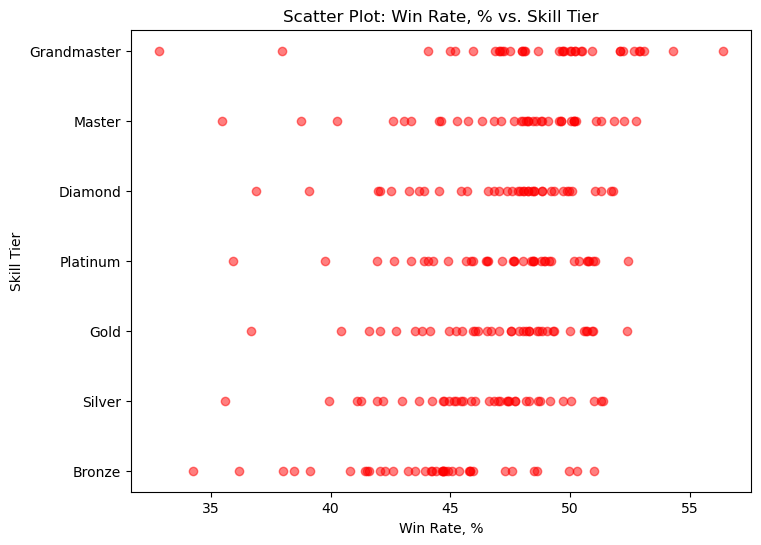

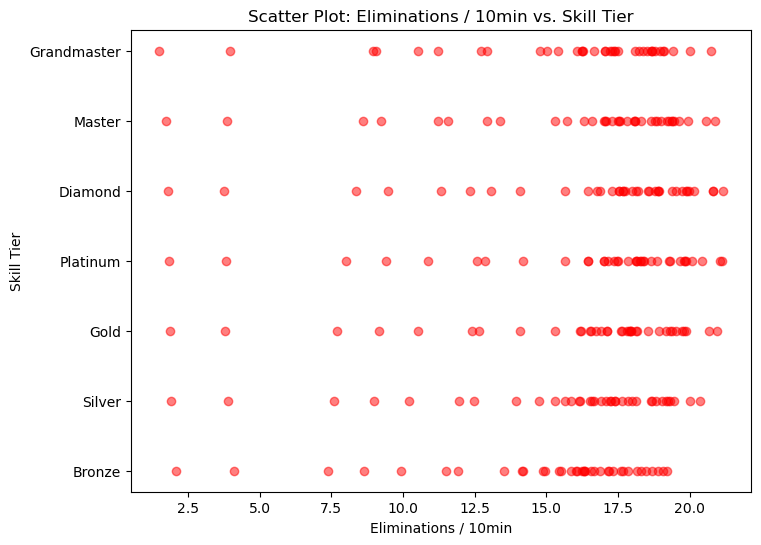

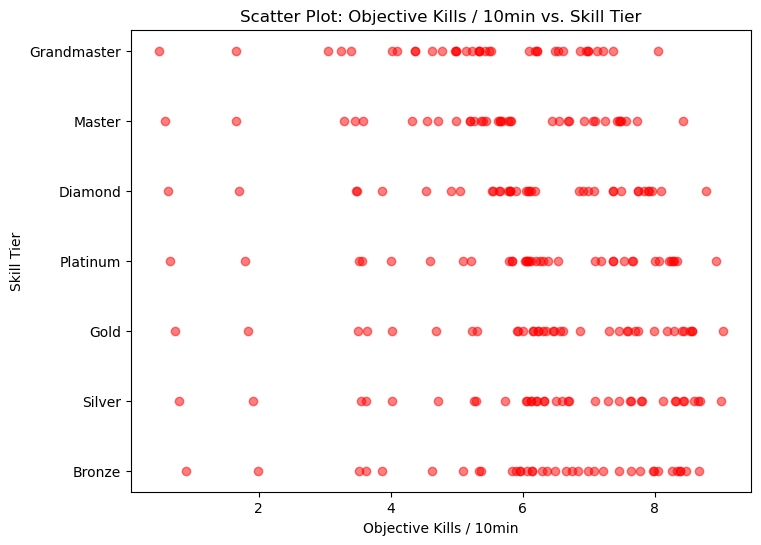

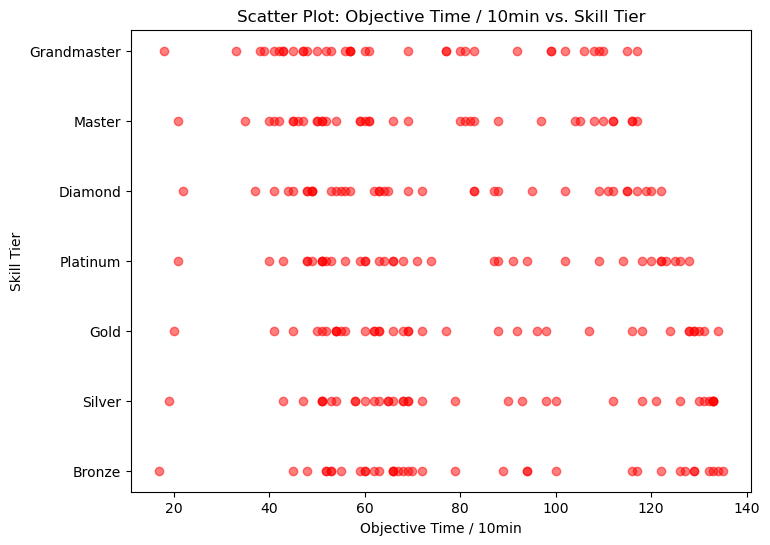

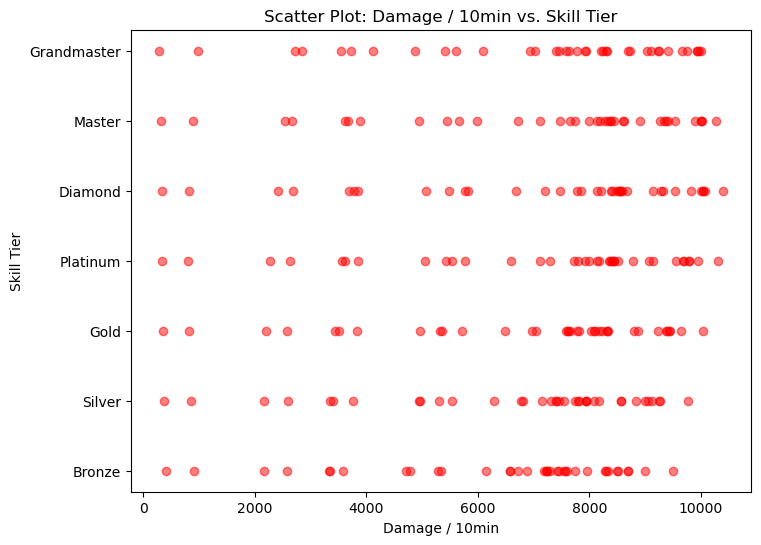

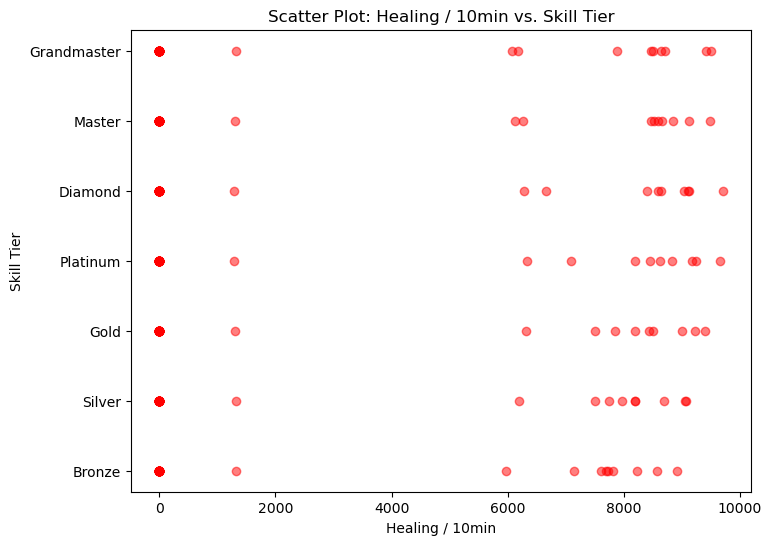

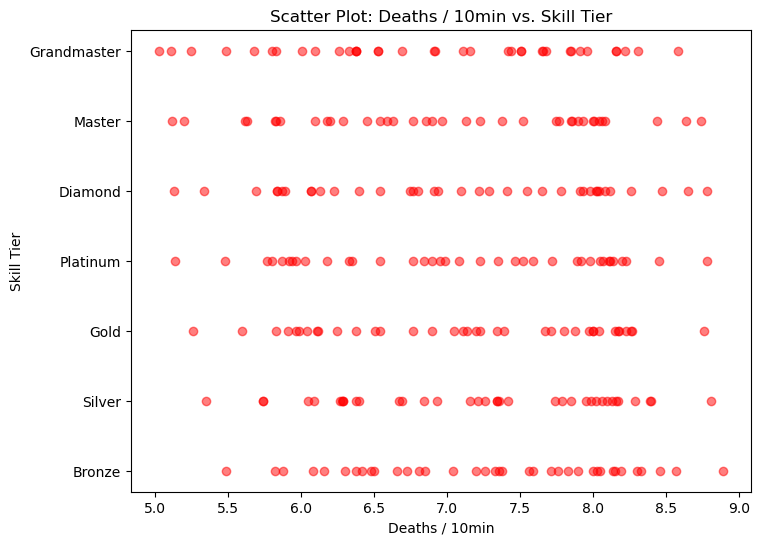

['KDA Ratio', 'Pick Rate, %', 'Win Rate, %', 'Eliminations / 10min', 'Objective Kills / 10min', 'Objective Time / 10min', 'Damage / 10min', 'Healing / 10min', 'Deaths / 10min', 'Hero_encoded']
performance evaluation: 
              precision    recall  f1-score   support

      Bronze       0.25      1.00      0.40         2
     Diamond       0.11      0.50      0.18         2
        Gold       0.33      0.25      0.29         4
 Grandmaster       0.00      0.00      0.00         4
      Master       1.00      0.20      0.33         5
    Platinum       0.00      0.00      0.00         8
      Silver       0.00      0.00      0.00         1

    accuracy                           0.19        26
   macro avg       0.24      0.28      0.17        26
weighted avg       0.27      0.19      0.15        26

Accuracy: 
0.19230769230769232
[[2 0 0 0 0 0 0]
 [1 1 0 0 0 0 0]
 [1 1 1 0 0 1 0]
 [0 2 0 0 0 0 2]
 [1 2 1 0 1 0 0]
 [2 3 1 2 0 0 0]
 [1 0 0 0 0 0 0]]
['Grandmaster']


c:\Users\tvndn\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [10]:
agent = ClassiferAgent()
#print(agent.df.head())
#print(agent.labels)
#print(agent.target)
#print(agent.features)

agent.Clean()
#print(agent.clean_df.head())
#print(agent.clean_features)

agent.Visualize()

agent.Encoding()

agent.Train()

agent.Evaluate()

#season 2 
new_hero = "Ana"
real_rank = "Bronze"
kda = 4.24
pick_rate = 4.51
win_rate = 44.79
elim = 9.15
objkills = 4.06
objtime = 59
dmg = 2703 
heal = 7536
death = 6.27




agent.Predict(new_hero,kda,pick_rate, win_rate, elim, objkills, objtime, dmg, heal, death)




